In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [3]:
x = np.load('./dataset/input.npz')
train_x = x['train_X']
train_x.shape

(500, 120, 7)

In [2]:
def npz_headers(npz):
    """
    Takes a path to an .npz file, which is a Zip archive of .npy files.
    Generates a sequence of (name, shape, np.dtype).
    """
    with zipfile.ZipFile(npz) as archive:
        for name in archive.namelist():
            if not name.endswith('.npy'):
                continue

            npy = archive.open(name)
            version = np.lib.format.read_magic(npy)
            shape, fortran, dtype = np.lib.format._read_array_header(npy, version)
            yield name[:-4], shape, dtype


In [3]:
# INPUT NPZ
for name, shape, dtype in npz_headers('dataset/input.npz'):
    print(name, shape, dtype)

train_X (500, 120, 7) float32
valid_X (500, 120, 7) float32
test_X (500, 120, 7) float32
train_y (500, 24) float32
valid_y (500, 24) float32
test_y (500, 24) float32
train_error (500, 9) float32
valid_error (500, 9) float32
test_error (500, 9) float32


In [4]:
# BM TEST PREDS NPZ
for name, shape, dtype in npz_headers('dataset/bm_test_preds.npz'):
    print(name, shape, dtype)

lstm1 (6867, 24) float32
lstm2 (6867, 24) float32
gru1 (6867, 24) float32
gru2 (6867, 24) float32
cnn1 (6867, 24) float32
cnn2 (6867, 24) float32
transformer1 (6867, 24) float32
transformer2 (6867, 24) float32
repeat (6867, 24) float32


(6867, 9, 24)
[[[ 0.9915313   0.8460323   0.80212957 ...  0.7315324   0.5730403
    0.5462347 ]
  [ 0.94667834  0.87906086  0.7384308  ...  0.9255415   0.83280814
    0.77384734]
  [ 1.0909529   1.0056591   0.8001778  ...  0.87761205  0.86247975
    0.8412637 ]
  ...
  [ 0.77978325  0.7130303   0.6352038  ...  0.8324423   0.8076507
    0.76877165]
  [ 0.81441224  0.7396751   0.66147876 ...  0.8662881   0.8470081
    0.80776477]
  [ 1.0793585   0.8748512   0.80552673 ...  1.1382843   1.1163316
    1.1036221 ]]

 [[ 0.92043716  0.771029    0.7291284  ...  0.7211737   0.5501742
    0.5255761 ]
  [ 0.8761046   0.7995424   0.66026187 ...  0.9143698   0.82178974
    0.7048383 ]
  [ 0.99504447  0.89101994  0.6922058  ...  0.8799422   0.87581474
    0.82456535]
  ...
  [ 0.72867525  0.65475994  0.57452863 ...  0.834981    0.7888007
    0.7335418 ]
  [ 0.77875054  0.6983655   0.6173238  ...  0.87657565  0.8389409
    0.78544337]
  [ 0.8748512   0.80552673  0.70038456 ...  1.1163316   1.1036221


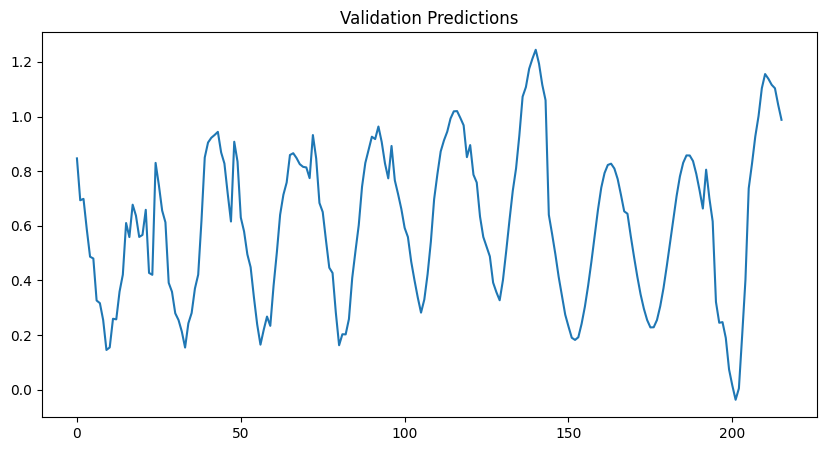

In [48]:
# VISUALIZE VALID PREDS
valid_preds = np.load('./dataset/bm_valid_preds.npy')
print(valid_preds.shape)
print(valid_preds[:10])

valid_preds = valid_preds.reshape(6867, -1)
print(valid_preds.shape)
print(valid_preds[:10])

# Visualize first 500 data using matplotlib
plt.figure(figsize=(10, 5))
plt.title('Validation Predictions')
plt.plot(valid_preds[:500][2])
plt.show()